#  Problem Statement and Data Description

## Chennai House Price Prediction (Regression)

ChennaiEstate is a real estate firm based in Chennai that is involved in the property business for the past 5 years. Since, they are in the business for so long, they have enough data of all the real estate transactions in the city.

They decided to venture into Analytics and have now started a division called “Chennai Estate Analytics” to give consumers as much information as possible about housings and the real estate market in Chennai. A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring real-estate owners have a trusted way to monitor the asset is incredibly important. Hence, they have hired you as a consultant to help them give insights and develop a model to accurately predict real estate prices.

Based on the train dataset, you will need to develop a model that accurately predicts the real estate price in Chennai.

### Data Description

## House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
       - Normal: Normal Sale
       - Abnorml: Abnormal Sale - trade, foreclosure, short sale
       - AdjLand: Adjoining Land Purchase
       - Family: Sale between family members
       - Partial: Home was not completed when last assessed
   - BUILDTYPE – The type of building
        - House
        - Commercial
        - Others



## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
        - AllPub: All public Utilities (E,G,W,& S)
        - NoSewr: Electricity, Gas, and Water (Septic Tank)
        - NoSeWa: Electricity and Gas Only
        - ELO: Electricity only
   - STREET
        - Gravel
        - Paved
        - No Access
   - MZZONE
        - A: Agriculture
        - C: Commercial
        - I: Industrial
        - RH: Residential High Density
        - RL: Residential Low Density
        - RM: Residential Medium Density
        

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


## Loading the Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# read the data
df=pd.read_csv('chennai_house_price_prediction.csv')

In [6]:
df.shape

(7109, 19)

In [7]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


## Data Exploration

In [8]:
df.describe() # describe the entire data , Only continous varaible

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [9]:
df.describe(include='all') # describe all categorical and continuous
# Count can be used to find out missing values
# Gives unique values for categorical varaibles

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P01908,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


### Isnull function 

In [11]:
df.isnull().sum()  # Missing values count

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

### Data types

In [12]:
df.dtypes  # object - Categorical other Continuous

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [13]:
# new temp data frame for datatpes, null and uniques vales
temp=pd.DataFrame(index=df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()

In [14]:
temp

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


In [15]:
df['N_BEDROOM'] 
# in above temp display , N_BEDROOM and N_BATHROOM is float (continuous) but uniue values 

0       1.0
1       2.0
2       1.0
3       3.0
4       1.0
       ... 
7104    1.0
7105    3.0
7106    2.0
7107    1.0
7108    3.0
Name: N_BEDROOM, Length: 7109, dtype: float64

## Univariate Analysis

### Histogram

Text(0.5, 0, 'Sales')

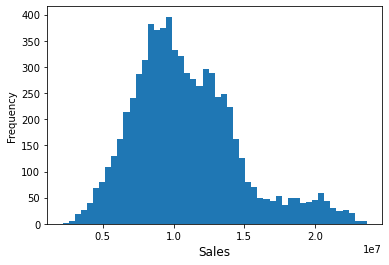

In [21]:
# target variable
df['SALES_PRICE'].plot.hist(bins=50)  # bins =50 means the changes in histogram 50.
# please check it without bins
plt.xlabel('Sales', fontsize=12)

- The distribution of the target varaibles is slightly right skewed
- We can see a small number of houses with a very high price

<AxesSubplot:ylabel='Frequency'>

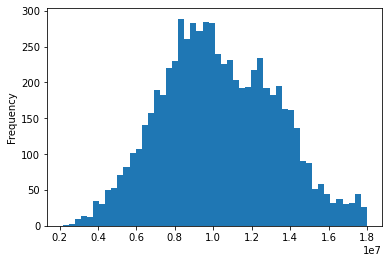

In [22]:
(df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000]).plot.hist(bins=50)

Text(0.5, 0, 'Area in sq ft')

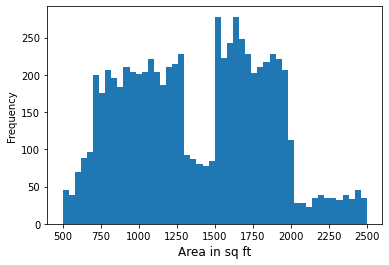

In [23]:
# Another variables  INT_SQFT
df['INT_SQFT'].plot.hist(bins=50)
plt.xlabel('Area in sq ft', fontsize=12)

- Most houses have the area between 750 to 1250 sq ft  and 1500 to 2000 sq ft. 
- Very less houses are in 2000 to 25000 so ut may be outlier

<AxesSubplot:ylabel='Frequency'>

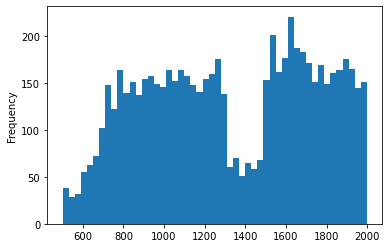

In [24]:
(df['INT_SQFT'].loc[df['INT_SQFT']<2000]).plot.hist(bins=50)

### Check the outher varaible

<AxesSubplot:ylabel='Frequency'>

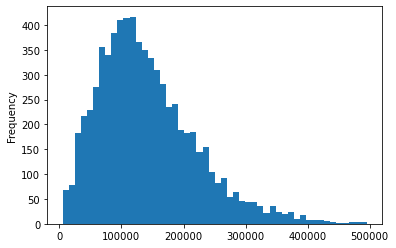

In [42]:
# DIST_MAINROAD   N_BEDROOM   N_BATHROOM N_ROOM   SALE_COND PARK_FACIL BUILDTYPE UTILITY_AVAIL STREET
# MZZONE QS_ROOMS QS_BATHROOM QS_BEDROOM QS_OVERALL COMMIS SALES_PRICE

#df['DIST_MAINROAD'].plot.hist(bins=50)
df['COMMIS'].plot.hist(bins=50) # here is Outlier

#plt.xlabel('Area in sq ft', fontsize=12)

### Categorical data
## Value Counts

In [43]:
# number of bedroom      N_BATHROOM      N_ROOM
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

- It has four diffrent categories
- This varaible should be obejct and not integer

In [46]:
df['N_BEDROOM'].value_counts()/len(df)*100  # This is the percentage of overall houses with number of Bedroom

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

- About 53% houses have one bedroom
- 33% have 2 bedrooms
- Less than 10% houses have 3 bedrooms
- Only 3.5% have 4 bedrooms

In [49]:
# N_BATHROOM N_ROOM
df['N_BATHROOM'].value_counts()/len(df)*100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

- 78% houses have 1 bathroom and 21% have 2 bathrooms
- The same can be represented using bar plots

In [50]:
# N_ROOM
df['N_ROOM'].value_counts()/len(df)*100

4    36.052891
3    29.891687
5    17.527078
2    12.955409
6     3.572936
Name: N_ROOM, dtype: float64

- The 'Rooms' might have number of kitchen, hall, dinning area etc.
- No house with 1 room, and a very few that have 2

## Bar Plot

<AxesSubplot:>

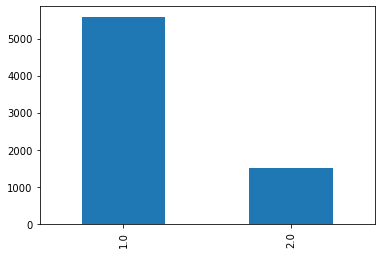

In [51]:
df['N_BATHROOM'].value_counts().plot(kind='bar')

<AxesSubplot:>

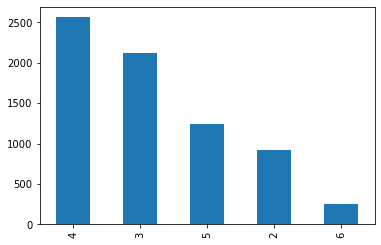

In [52]:
df['N_ROOM'].value_counts().plot(kind='bar')

<AxesSubplot:>

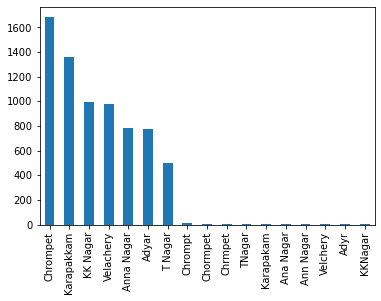

In [54]:
#AREA
df['AREA'].value_counts().plot(kind = 'bar')

- There are 17 different categories in the 'AREA' variable
- Only 7 unique area name
- maximum houses are in the area Chrompet, followed by Karapakkam

<AxesSubplot:>

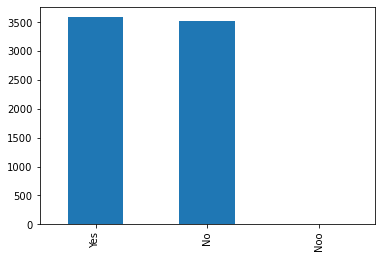

In [55]:
#PARK_FACIL
df['PARK_FACIL'].value_counts().plot(kind = 'bar')

- there is spelling error. Findout where

In [57]:
df['PARK_FACIL'].value_counts()  # only 2 rows with error Noo

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

- There are only two unique categories
- The number of houses with parking facility in both the cases is almost the same

# Data Manipulation


1. Drop Duplicates (if any)
2. Fill the missing Values
3. Correct the data types 
4. Fix the spelling errors in variables

### Drop Duplicates (if any)

In [58]:
df.drop_duplicates() # remove all the rows which has same data in every column

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [59]:
df.drop_duplicates().shape

(7109, 19)

In [60]:
df.shape

(7109, 19)

- We have no duplicates. Hence the shape did not change here.

### Missing Values

In [62]:
# ### Missing Values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

**Different ways deal with the missing values**

- Remove the rows with missing values
- Mean or median in case of continuous variable
- With mode in case of categorical variable
- Using other independent variables

### Drop rows with missing values

In [63]:
df.dropna(axis=0,how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


- To make changes to original data, use inplace=True
- In this case, 54 rows removed

In [65]:
df.dropna(axis=1,how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,144400,7600000
1,P09411,Anna Nagar,1986,26,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,304049,21717770
2,P01812,Adyar,909,70,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,92114,13159200
3,P05346,Velachery,1855,14,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,77042,9630290
4,P06210,Karapakkam,1226,84,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,107060,5353000
7105,P10000,Velachery,1897,52,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,205551,10818480
7106,P09594,Velachery,1614,152,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,167028,8351410
7107,P06508,Karapakkam,787,40,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,119098,8507000


- When axis is set to 1, columns are dropped.
- For given data, 3 columns has missing values hence three columns dropped
- To avoid loss of data, we can use other ways of imputation

## Use another way to deal with missing values

### 1.N_BEDROOM

In [66]:
df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [67]:
df['N_BEDROOM'].fillna(value=(df['N_BEDROOM'].mode()[0]),inplace=True)

In [68]:
df.isnull().sum() # Now no missing value in N_BEDROOM

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

#### 2. N_BATHROOM

In [70]:
df.loc[df['N_BATHROOM'].isnull()==True] # All the rows which have NULL in N_BATHROOM

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


### So fill this null value using some logic 
### As if 1BHK -  Bathroom otherwise 2 Bathroom

In [71]:
for i in range(0,len(df)):
    if pd.isnull(df['N_BATHROOM'][i])==True:
        if (df['N_BATHROOM'][i]==1.0):
            df['N_BATHROOM'][i]=1.0
        else:
            df['N_BATHROOM'][i]=2.0

<ipython-input-71-f5a860bdc6b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['N_BATHROOM'][i]=2.0


In [73]:
df.isnull().sum() # Now there is no missing value in N_BATHROOM

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

### 3. QS_OVERALL       

In [74]:
df[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


### from the avove result, we can say QS_OVERALL is nothing but the avg of all Qs(ROOMS,BATHROOM and BEDROOM )

In [78]:
temp=(df['QS_ROOMS']+df['QS_BATHROOM']+df['QS_BEDROOM'])/3
pd.concat([df['QS_ROOMS'],df['QS_BATHROOM'],df['QS_BEDROOM'],temp],axis=1).head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,0
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000


- Imputing missing values with the help of other 'quality score' columns
- Additionally we can assign higher weights to n_bedroom and lower to n_bathroom

In [80]:
df.loc[df['QS_OVERALL'].isnull()==True].shape # Number of missing values

(48, 19)

In [81]:
def fillna(x):
    return ((x['QS_ROOMS']+x['QS_BATHROOM']+x['QS_BEDROOM'])/3)

In [82]:
df['QS_OVERALL']=df.apply(lambda x: fillna(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'], axis=1)

In [83]:
df.loc[df['QS_OVERALL'].isnull()==True].shape  # Now No missing value in QS_OVERALL

(0, 19)

In [84]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

- There is no missing value in data frame

## Data Types

In [85]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

### N_BEDROOM ,  N_BATHROOM, N_ROOM   are showing float but it must be categorical in nature                        

In [86]:
# data types of N_BEDROOM ,  N_BATHROOM, N_ROOM 
df=df.astype({'N_BEDROOM':'object' ,  'N_BATHROOM':'object', 'N_ROOM':'object'})

In [87]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

### Replace Categories

In [88]:
temp=['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('*************** Value Count in', i,'***********')
    print(df[i].value_counts())
    print(' ')

*************** Value Count in AREA ***********
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Ann Nagar        2
Velchery         2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64
 
*************** Value Count in N_BEDROOM ***********
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64
 
*************** Value Count in N_BATHROOM ***********
1.0    5589
2.0    1520
Name: N_BATHROOM, dtype: int64
 
*************** Value Count in N_ROOM ***********
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64
 
*************** Value Count in SALE_COND ***********
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl        

**Update names in column**
- AREA
- SALE_COND
- PARK_FACIL
- BUILDTYPE
- UTILITY_AVAIL
- STREET

### Replace the wrong spelling with correct one

In [92]:
df['AREA'].replace({'Chrompt':'Chrompet','Chormpet':'Chrompet','Chrmpet':'Chrompet',
                    'Karapakam':'Karapakkam',
                    'KKNagar':'KK Nagar',
                    'Velchery':'Velachery',
                    'Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar',
                    'TNagar':'T Nagar',
                    'Adyr':'Adyar' }, inplace=True)
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [93]:
df['SALE_COND'].replace({'Adj Land':'AdjLand',
                         'Ab Normal':'AbNormal',
                         'Partiall':'Partial','PartiaLl':'Partial'}, inplace=True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [94]:
df['PARK_FACIL'].replace ({'Noo':'No'}, inplace=True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [95]:
df['BUILDTYPE'].replace({'Comercial':'Commercial',
                         'Other':'Others'}, inplace=True)
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [96]:
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'}, inplace=True)
df['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [97]:
df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'}, inplace=True)
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [98]:
temp=['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('*************** Value Count in', i,'***********')
    print(df[i].value_counts())
    print(' ')

*************** Value Count in AREA ***********
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64
 
*************** Value Count in N_BEDROOM ***********
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64
 
*************** Value Count in N_BATHROOM ***********
1.0    5589
2.0    1520
Name: N_BATHROOM, dtype: int64
 
*************** Value Count in N_ROOM ***********
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64
 
*************** Value Count in SALE_COND ***********
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64
 
*************** Value Count in PARK_FACIL ***********
Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64
 
*************** Value Count in BUILDTYPE ***********
House         2444
Others        2336
Commercial    2329
Name: BUILDTY

# BIVARIATE ANALYSIS

  
## House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
       - Normal: Normal Sale
       - Abnorml: Abnormal Sale - trade, foreclosure, short sale
       - AdjLand: Adjoining Land Purchase
       - Family: Sale between family members
       - Partial: Home was not completed when last assessed
   - BUILDTYPE – The type of building
        - House
        - Commercial
        - Others



## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
        - AllPub: All public Utilities (E,G,W,& S)
        - NoSewr: Electricity, Gas, and Water (Septic Tank)
        - NoSeWa: Electricity and Gas Only
        - ELO: Electricity only
   - STREET
        - Gravel
        - Paved
        - No Access
   - MZZONE
        - A: Agriculture
        - C: Commercial
        - I: Industrial
        - RH: Residential High Density
        - RL: Residential Low Density
        - RM: Residential Medium Density
        

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


In [99]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

## Hypothesis -
 - Sales price should increase with increase in interior square feet
 - The sales price would depend on the area where house is located
 - Higher the number of rooms, bathrooms in the house, more should be the price 

  
## 1. House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
   - BUILDTYPE – The type of building

### oneby one check all varaible with sales price **

**1. Interior area and sales price (target)**

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

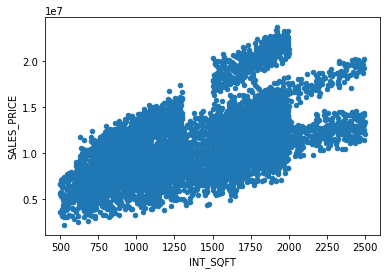

In [100]:
df.plot.scatter('INT_SQFT','SALES_PRICE')

- A very clear linear relationship can be seen between the interior area and sales price
- These variables have a positive correlation
- 1500 to 2000 there is some other varaible invlove for sales price decision

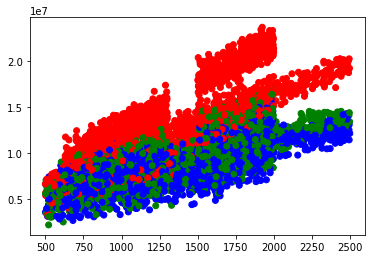

In [102]:
fig,ax=plt.subplots()
colors={'Commercial':'red','House':'blue','Others':'green'}
ax.scatter(df['INT_SQFT'],df['SALES_PRICE'],c=df['BUILDTYPE'].apply(lambda x:colors[x]))
plt.show()

**2. Sales Price against no of bedroom and bathroom**

## What is pivot_table

In [104]:
df1 = pd.read_csv("weather.csv")
df1

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


### index == row and column= column name

In [106]:
df1.pivot(index='city',columns='date')

temperature                   humidity                  
date        5/1/2017 5/2/2017 5/3/2017 5/1/2017 5/2/2017 5/3/2017
city                                                             
beijing           80       77       79       26       30       35
mumbai            75       78       82       80       83       85
new york          65       66       68       56       58       60

### Pivot table is used to sumeerized and aggrigate data inside the data frame

In [112]:
df1.pivot_table(index="city",columns="date")

humidity                   temperature                  
date     5/1/2017 5/2/2017 5/3/2017    5/1/2017 5/2/2017 5/3/2017
city                                                             
beijing        26       30       35          80       77       79
mumbai         80       83       85          75       78       82
new york       56       58       60          65       66       68

In [108]:
df1.pivot(index='city',columns='date',values="humidity")

date,5/1/2017,5/2/2017,5/3/2017
city,,,
beijing,26,30,35
mumbai,80,83,85
new york,56,58,60


## Margins

In [114]:
df1.pivot_table(index="city",columns="date",aggfunc=np.sum)

humidity                   temperature                  
date     5/1/2017 5/2/2017 5/3/2017    5/1/2017 5/2/2017 5/3/2017
city                                                             
beijing        26       30       35          80       77       79
mumbai         80       83       85          75       78       82
new york       56       58       60          65       66       68

In [115]:
df1.pivot_table(index="city",columns="date", margins=True,aggfunc=np.sum)

humidity                        temperature                       
date     5/1/2017 5/2/2017 5/3/2017  All    5/1/2017 5/2/2017 5/3/2017  All
city                                                                       
beijing        26       30       35   91          80       77       79  236
mumbai         80       83       85  248          75       78       82  235
new york       56       58       60  174          65       66       68  199
All           162      171      180  513         220      221      229  670

In [116]:
# Sales   price of houses wrt number of bedroom and bathrooms
df.pivot_table(index='N_BEDROOM',columns='N_BATHROOM',values='SALES_PRICE', aggfunc='median')


N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,9747670.0
2.0,12129780.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


**3. QS_OVERALL and sales price**

<AxesSubplot:xlabel='QS_OVERALL', ylabel='SALES_PRICE'>

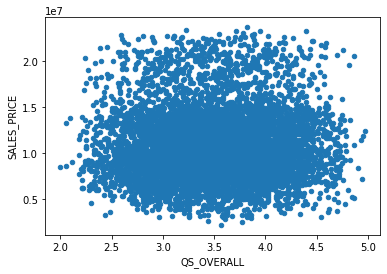

In [117]:
# QS_Overall and sale_price 
df.plot.scatter('QS_OVERALL', 'SALES_PRICE')

Text(0.5, 1.0, 'QS_OVERALL')

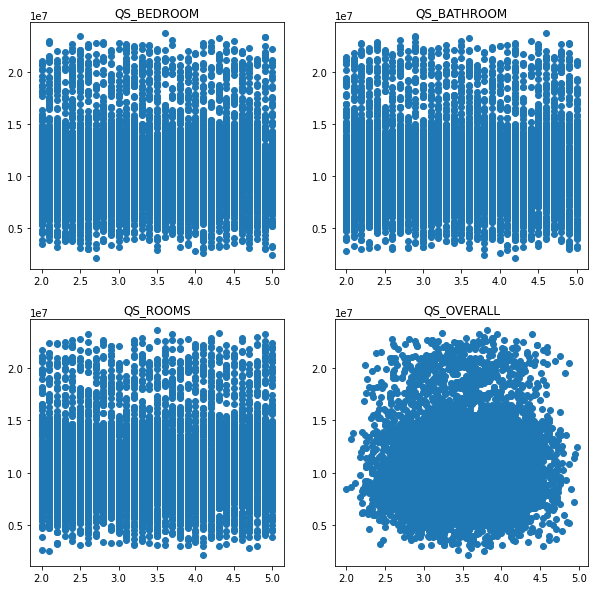

In [119]:
fig, axs=plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(10)


axs[0,0].scatter(df['QS_BEDROOM'],df['SALES_PRICE'])   #QS_BEDROOM and SALES_PRICE
axs[0,0].set_title('QS_BEDROOM')

axs[0,1].scatter(df['QS_BATHROOM'],df['SALES_PRICE'])   #QS_BATHROOM and SALES_PRICE
axs[0,1].set_title('QS_BATHROOM')

axs[1,0].scatter(df['QS_ROOMS'],df['SALES_PRICE'])   #QS_ROOMS and SALES_PRICE
axs[1,0].set_title('QS_ROOMS')

axs[1,1].scatter(df['QS_OVERALL'],df['SALES_PRICE'])   #QS_OVERALL and SALES_PRICE
axs[1,1].set_title('QS_OVERALL')

 ### BOXPLOT

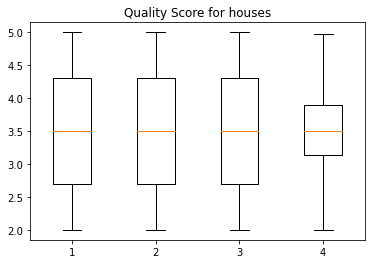

In [123]:
# Create an axes instance
ax= plt.figure().add_subplot(111) # "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot"

ax.set_title('Quality Score for houses')

#create the boxplot
bp=ax.boxplot([df['QS_BEDROOM'],df['QS_ROOMS'],df['QS_BATHROOM'],df['QS_OVERALL']])

- Distribution of number of houses in each quartile is same for 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM'
- For QS_OVERALL, 50 % of values lie in a very small range of ~3.2 to 3.7 score

**4. Building type and sales price**

In [124]:
# Sale price based on building types
df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

- Houses built for commercial purposes have a considerably higher sale price
- Houses with additional facility should have higher price

<AxesSubplot:ylabel='Frequency'>

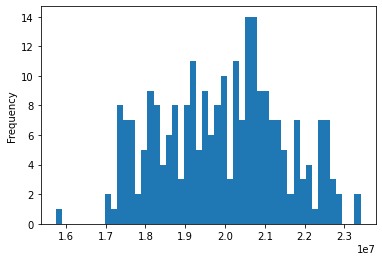

In [125]:
temp_df=df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

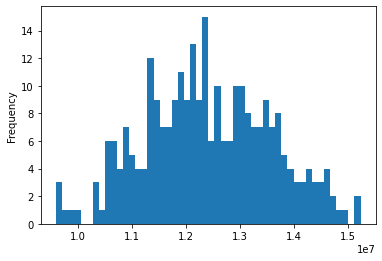

In [126]:
temp_df=df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
   - STREET
   - MZZONE  

**5. Building type and parking facility**

In [127]:
# Building type and parking facility
df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

- For all three categories, houses with park facility have a higher price
- we can use groupby function to generate a plot for better comparison

<AxesSubplot:xlabel='BUILDTYPE,PARK_FACIL'>

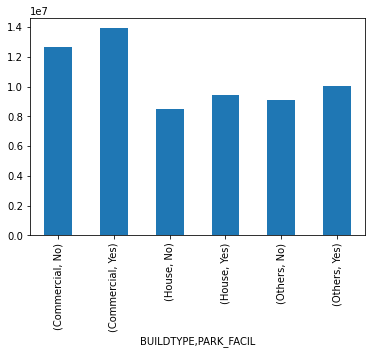

In [128]:
temp=df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()
temp.plot(kind='bar',stacked=True)

**6. Area-wise price for houses**

In [130]:
# Avg price for eavh area category
df.pivot_table(index='AREA',values='SALES_PRICE',aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8878350
Anna Nagar,13727895
Chrompet,9606725
KK Nagar,12146740
Karapakkam,7043125
T Nagar,14049650
Velachery,10494410


- Anna Nagar and T Nagar are comparatively more expensive
- The least priced are among the 7 is karapakkam

<AxesSubplot:ylabel='Frequency'>

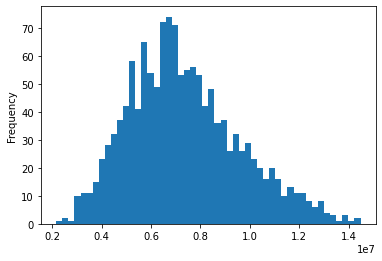

In [132]:
temp_df=df.loc[(df['AREA']=='Karapakkam')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

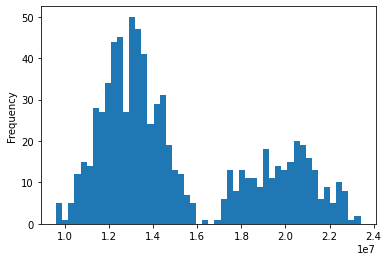

In [133]:
temp_df=df.loc[(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

**7. Distance from main road**

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

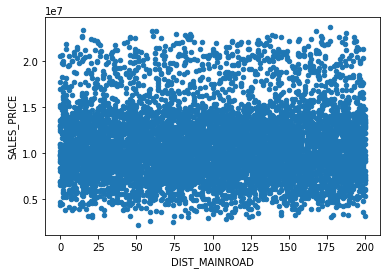

In [135]:
df.plot.scatter('DIST_MAINROAD','SALES_PRICE')

**8. Type of street around the house**

In [136]:
df.groupby(['STREET']).SALES_PRICE.median()

STREET
Gravel       10847225
No Access     9406050
Paved        10470070
Name: SALES_PRICE, dtype: int64

- Both gravel and paved roads have approximately same sale price
- Houses marked with 'no access' have a lower sale price

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


<AxesSubplot:xlabel='SALES_PRICE', ylabel='COMMIS'>

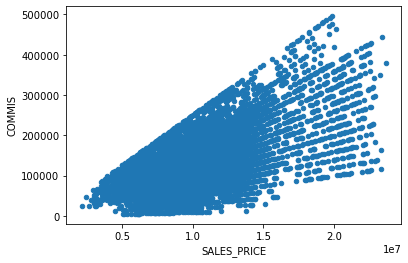

In [137]:
# commission and sales price

df.plot.scatter('SALES_PRICE', 'COMMIS')

In [138]:
df[['SALES_PRICE', 'COMMIS']].corr()

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000
